<a href="https://colab.research.google.com/github/3mo0o0ry2001/Drybean---outliers/blob/main/Outliers_Drybean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/Dry_Bean_Dataset.csv')
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
data.isna().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [4]:
data['Perimeter'].describe()

,Perimeter
count,13611.000000
mean,855.283459
std,214.289696
min,524.736000
25%,703.523500
50%,794.941000
75%,977.213000
max,1985.370000


<Axes: >

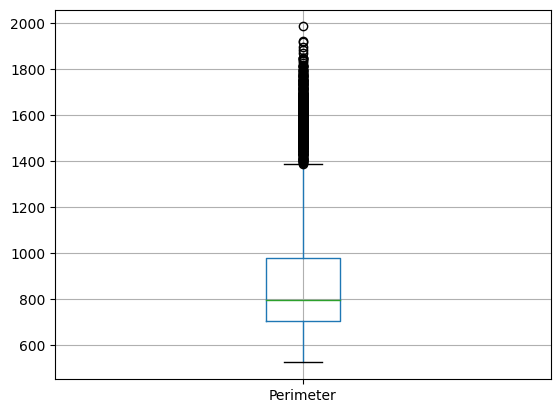

In [5]:
data.boxplot('Perimeter')

In [6]:
Data = data[data['Perimeter'] < 1400]
Data.shape

(13115, 17)

In [7]:
Data['Perimeter'].describe()

,Perimeter
count,13115.000000
mean,827.221384
std,160.053647
min,524.736000
25%,700.314500
50%,786.695000
75%,954.850000
max,1396.139000


In [8]:
RangeData = data[data['Perimeter'] < 1400]
OutlierData = data[data['Perimeter'] >= 1400]
RangeData.shape, OutlierData.shape

((13115, 17), (496, 17))

In [9]:
OutlierAcceptedData = OutlierData.sample(frac=0.2)
OutlierAcceptedData.shape

(99, 17)

In [10]:
FinalData = pd.concat([RangeData, OutlierAcceptedData], axis=0)

In [11]:
FinalData.reset_index(inplace=True)
FinalData

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13209,3411,146328,1476.390,542.281636,346.050460,1.567059,0.769922,149274,431.637112,0.764794,0.980264,0.843597,0.795965,0.003706,0.000918,0.633560,0.992826,BOMBAY
13210,3837,210910,1748.332,675.707743,400.404310,1.687564,0.805519,212898,518.207441,0.809840,0.990662,0.867080,0.766911,0.003204,0.000684,0.588152,0.992544,BOMBAY
13211,3645,175738,1572.654,575.795514,393.069354,1.464870,0.730741,178091,473.029144,0.744810,0.986788,0.892913,0.821523,0.003276,0.000921,0.674900,0.988640,BOMBAY
13212,3409,146153,1476.383,526.193326,356.528288,1.475881,0.735466,149267,431.378928,0.731936,0.979138,0.842596,0.819811,0.003600,0.001003,0.672090,0.991924,BOMBAY
